## Amazon Prime Users Assignment
### Lecture Session: TC2L
### Group A128 Member:
### Ng Xhun Yan (251UC250X9)
### Koh Soon Keat (251UC250F2)

### Import all necessary libraries for analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from datetime import datetime

## Exploratory Data Analysis
### Reading the data into pandas dataframe
Reading the data into pandas dataframe for analysis. Printing out the basic information such as shape of the dataframe, first 5 rows of the record and the data type for each feature (column).


In [2]:
Amazon_Prime = pd.read_csv('Amazon_Prime_Users.csv')
print("Rows, cols:", Amazon_Prime.shape)
display(Amazon_Prime.head(5))
Amazon_Prime.info()

Rows, cols: (2530, 19)


,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,3/6/1953,Male,Rebeccachester,15/1/2024,14/1/2025,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3.0
1,2,Scott Allen,scott22@example.org,scott22,8/7/1978,Male,Mcphersonview,7/1/2024,6/1/2025,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7.0
2,3,Jonathan Parrish,brooke16@example.org,brooke16,6/12/1994,Female,Youngfort,13/4/2024,13/4/2025,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8.0
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,22/12/1964,Female,Feliciashire,24/1/2024,23/1/2025,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7.0
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,4/6/1961,Male,Port Deborah,14/2/2024,13/2/2025,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User ID                        2530 non-null   int64  
 1   Name                           2530 non-null   object 
 2   Email Address                  2530 non-null   object 
 3   Username                       2530 non-null   object 
 4   Date of Birth                  2530 non-null   object 
 5   Gender                         2530 non-null   object 
 6   Location                       2530 non-null   object 
 7   Membership Start Date          2530 non-null   object 
 8   Membership End Date            2530 non-null   object 
 9   Subscription Plan              2530 non-null   object 
 10  Payment Information            2530 non-null   object 
 11  Renewal Status                 2530 non-null   object 
 12  Usage Frequency                2530 non-null   o

Performing some basic data exploration for basic understanding.

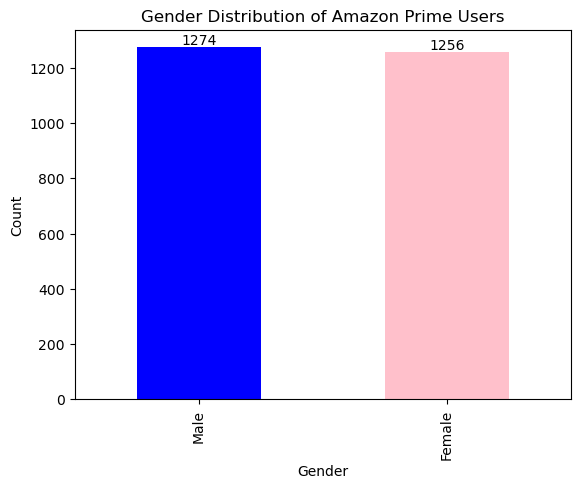

In [3]:
ax = Amazon_Prime['Gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])
for container in ax.containers:
	ax.bar_label(container, label_type='edge')
plt.title('Gender Distribution of Amazon Prime Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

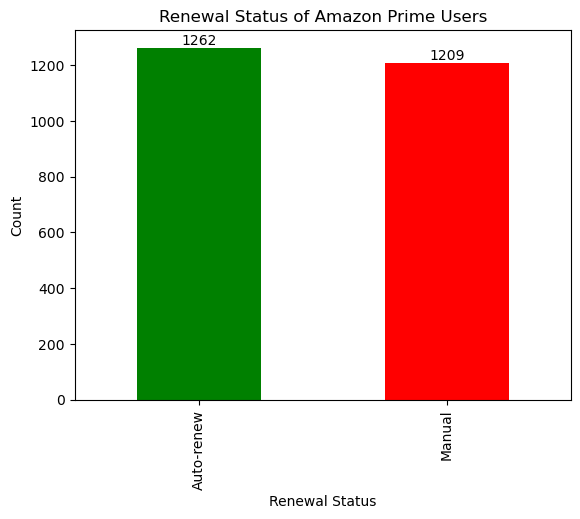

In [18]:
ax = Amazon_Prime['Renewal Status'].value_counts().plot(kind='bar', color=['green', 'red'])
for container in ax.containers:
	ax.bar_label(container, label_type='edge')
plt.title('Renewal Status of Amazon Prime Users')
plt.xlabel('Renewal Status')
plt.ylabel('Count')
plt.show()

## Data Preprocessing
### Data Cleaning
#### Cleaning Null Entry
This step is to check for any **null** entry before any furthur analysis

In [5]:
Amazon_Prime.isnull().sum()

User ID                           0
Name                              0
Email Address                     0
Username                          0
Date of Birth                     0
Gender                            0
Location                          0
Membership Start Date             0
Membership End Date               0
Subscription Plan                 0
Payment Information               0
Renewal Status                    0
Usage Frequency                   0
Purchase History                  0
Favorite Genres                   0
Devices Used                      0
Engagement Metrics                0
Feedback/Ratings                 16
Customer Support Interactions    13
dtype: int64

Since the null entries are not significant (standing at 29) compare to the dataset, the strategy used to handle null entries is to drop the entry by using **Listwise Deletion**

In [6]:
Amazon_Prime = Amazon_Prime.dropna()
print(Amazon_Prime.isnull().sum())
Amazon_Prime.shape

User ID                          0
Name                             0
Email Address                    0
Username                         0
Date of Birth                    0
Gender                           0
Location                         0
Membership Start Date            0
Membership End Date              0
Subscription Plan                0
Payment Information              0
Renewal Status                   0
Usage Frequency                  0
Purchase History                 0
Favorite Genres                  0
Devices Used                     0
Engagement Metrics               0
Feedback/Ratings                 0
Customer Support Interactions    0
dtype: int64


(2501, 19)

#### Duplicate Entries
It is crucial to check if there is any duplicate entries in the dataset. Duplicate entries should be handled as it will affect the statistics of the dataset when performing analysis later on.

In [7]:
Amazon_Prime.duplicated().sum()

np.int64(30)

In this dataset, it is observed that 30 duplicate entries were recorded in this dataset. Let's handle the duplicate entries by removing it. Removing the entry is to make sure that the data mining does not bias towards duplicate entries.

In [8]:
Amazon_Prime = Amazon_Prime.drop_duplicates()
Amazon_Prime.duplicated().sum()

np.int64(0)

Let's check the shape of the data after handling duplicate and null entries.

In [9]:
Amazon_Prime.shape

(2471, 19)

### Data Transformation
Let's transform the date features (columns) from string to date format for subsequent analysis.

In [10]:
Amazon_Prime['Date of Birth'] = pd.to_datetime(Amazon_Prime['Date of Birth'], format='%d/%m/%Y')
Amazon_Prime['Membership Start Date'] = pd.to_datetime(Amazon_Prime['Membership Start Date'], format='%d/%m/%Y')
Amazon_Prime['Membership End Date'] = pd.to_datetime(Amazon_Prime['Membership End Date'], format='%d/%m/%Y')
Amazon_Prime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2471 entries, 0 to 2529
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   User ID                        2471 non-null   int64         
 1   Name                           2471 non-null   object        
 2   Email Address                  2471 non-null   object        
 3   Username                       2471 non-null   object        
 4   Date of Birth                  2471 non-null   datetime64[ns]
 5   Gender                         2471 non-null   object        
 6   Location                       2471 non-null   object        
 7   Membership Start Date          2471 non-null   datetime64[ns]
 8   Membership End Date            2471 non-null   datetime64[ns]
 9   Subscription Plan              2471 non-null   object        
 10  Payment Information            2471 non-null   object        
 11  Renewal Status        

#### Adding Age Column 
Adding the age column for analysis. To do so we are going to use *January 1st 2025* as the cut off date to calculate the age of the user.

In [11]:
birthday_cut_off = pd.to_datetime('2025-01-01')
Amazon_Prime['Age'] = ((birthday_cut_off - Amazon_Prime['Date of Birth']).dt.days / 365.25).astype(int)
Amazon_Prime.head()

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions,Age
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3.0,71
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7.0,46
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8.0,30
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7.0,60
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1.0,63


### Exploratory Data Analysis
We will be exploring the data again after cleaning the data. Let's start with the summary of the data.

In [25]:
print("Numerical Data Statistics: ")
display(Amazon_Prime.describe(include=['number']))
print("Categorical Data Statistics: ")
display(Amazon_Prime.describe(include=['object']))

Numerical Data Statistics: 


,User ID,Feedback/Ratings,Customer Support Interactions,Age
count,2471.000000,2471.000000,2471.000000,2471.000000
mean,1253.832052,4.006758,4.963982,54.707811
std,722.039648,0.577527,3.188656,21.075102
min,1.000000,3.000000,0.000000,18.000000
25%,631.500000,3.500000,2.000000,36.000000
50%,1256.000000,4.000000,5.000000,55.000000
75%,1879.500000,4.500000,8.000000,73.000000
max,2500.000000,5.000000,10.000000,91.000000


Categorical Data Statistics: 


,Name,Email Address,Username,Gender,Location,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics
count,2471,2471,2471,2471,2471,2471,2471,2471,2471,2471,2471,2471,2471
unique,2429,2453,2432,2,2244,2,3,2,3,3,7,3,3
top,Michael Smith,njohnson@example.org,scott11,Male,East Robert,Annual,Mastercard,Auto-renew,Frequent,Books,Action,Smartphone,High
freq,3,2,3,1245,5,1255,850,1262,843,840,377,855,835


Next, let's check the age distribution of the dataset.

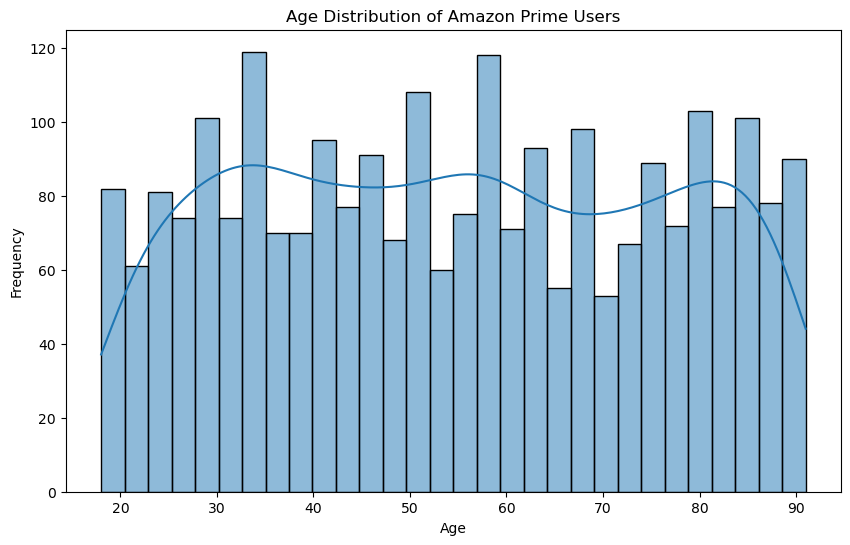

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(Amazon_Prime['Age'], bins=30, kde=True)
plt.title('Age Distribution of Amazon Prime Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Let's explore the gender distribution and the renewal status distribution.

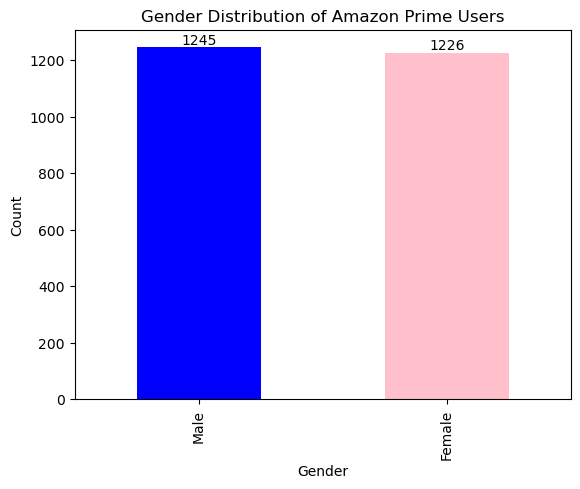

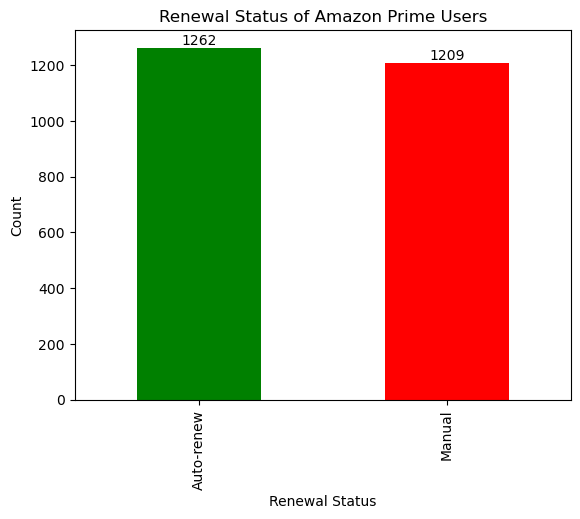

In [19]:
ax = Amazon_Prime['Gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])
for container in ax.containers:
	ax.bar_label(container, label_type='edge')
plt.title('Gender Distribution of Amazon Prime Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

ax = Amazon_Prime['Renewal Status'].value_counts().plot(kind='bar', color=['green', 'red'])
for container in ax.containers:
	ax.bar_label(container, label_type='edge')
plt.title('Renewal Status of Amazon Prime Users')
plt.xlabel('Renewal Status')
plt.ylabel('Count')
plt.show()

### Question 1 :

Is there a significant association between younger users aged 18–30 with high streaming frequency and their likelihood of providing an ‘excellent’ rating for Prime Video content?

In [13]:
Amazon_Prime['age_group'] = pd.cut(Amazon_Prime['Age'], 
                         bins=[0,18,30,40,60,200], 
                         labels=['<18','18-30','31-40','41-60','60+'])

In [14]:
print("\nUnique Usage Frequency values:", Amazon_Prime['Usage Frequency'].unique())


Unique Usage Frequency values: ['Regular' 'Frequent' 'Occasional']


In [27]:
young_users = Amazon_Prime[Amazon_Prime['age_group'] == '18-30']
print("\nTotal 18-30 users:", len(young_users))
young_users


Total 18-30 users: 390


,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,...,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions,Age,age_group
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,...,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8.0,30,18-30
6,7,Benjamin Marshall,michaellewis@example.net,michaellewis,2003-02-09,Male,Carlsonchester,2024-04-08,2025-04-08,Monthly,...,Auto-renew,Frequent,Clothing,Sci-Fi,Tablet,Medium,4.4,10.0,21,18-30
10,11,Douglas Hampton,tonya16@example.com,tonya16,1997-11-28,Female,Cynthiaport,2024-03-24,2025-03-24,Monthly,...,Manual,Regular,Books,Documentary,Smart TV,Low,4.0,1.0,27,18-30
14,15,Melanie Burns,meyerstacy@example.net,meyerstacy,2003-04-07,Male,East Janetfurt,2024-02-23,2025-02-22,Annual,...,Manual,Regular,Clothing,Sci-Fi,Smartphone,Medium,4.9,10.0,21,18-30
22,23,Tracy Hardin,ronald82@example.net,ronald82,1996-02-13,Female,North Audrey,2024-04-14,2025-04-14,Monthly,...,Auto-renew,Regular,Books,Comedy,Smart TV,High,4.3,7.0,28,18-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,2424,Lauren Johnson,patriciaclarke@example.com,patriciaclarke,2004-09-25,Female,Kimberlyville,2024-02-10,2025-02-09,Monthly,...,Auto-renew,Frequent,Clothing,Horror,Smartphone,Medium,4.2,4.0,20,18-30
2459,2434,Chloe Simpson,nathankennedy@example.org,nathankennedy,1997-10-06,Female,East Victoriastad,2024-01-07,2025-01-06,Annual,...,Auto-renew,Regular,Books,Horror,Tablet,Low,4.6,8.0,27,18-30
2478,2452,William Walker,antonio21@example.org,antonio21,1999-10-08,Male,Marquezhaven,2024-02-18,2025-02-17,Annual,...,Manual,Occasional,Clothing,Horror,Tablet,Low,3.1,1.0,25,18-30
2507,2479,James Patterson III,holly00@example.com,holly00,1996-07-28,Female,Christopherburgh,2024-02-13,2025-02-12,Monthly,...,Auto-renew,Frequent,Clothing,Sci-Fi,Smart TV,Medium,3.7,8.0,28,18-30


In [30]:
crosstab = pd.crosstab(young_users['Usage Frequency'], young_users['Feedback/Ratings'] >= 8)
crosstab_norm = pd.crosstab(
    young_users['Usage Frequency'] == 'Frequent',
    young_users['Feedback/Ratings'] >= 8,
    normalize='index'
)

print("\nCrosstab (Counts):\n", crosstab)
print("\nCrosstab (Proportions):\n", crosstab_norm)


Crosstab (Counts):
 Feedback/Ratings  False
Usage Frequency        
Frequent            148
Occasional          116
Regular             126

Crosstab (Proportions):
 Feedback/Ratings  False
Usage Frequency        
False               1.0
True                1.0


<Figure size 640x480 with 0 Axes>

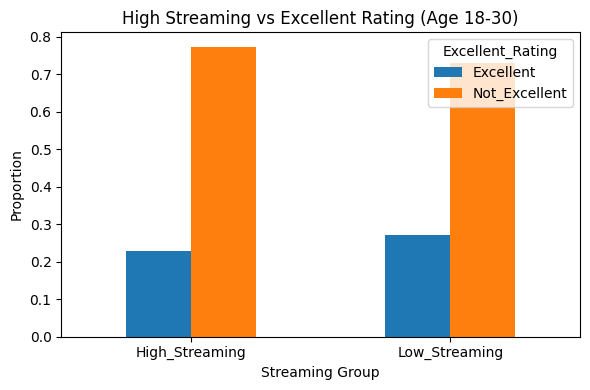

In [ ]:
plt.figure()
crosstab_norm.plot(kind='bar', figsize=(6,4))
plt.title("High Streaming vs Excellent Rating (Age 18-30)")
plt.xlabel("Streaming Group")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


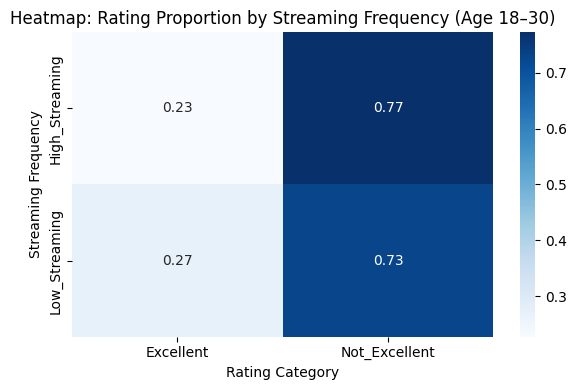

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(crosstab_norm, annot=True, cmap="Blues", fmt=".2f")
plt.title("Heatmap: Rating Proportion by Streaming Frequency (Age 18–30)")
plt.ylabel("Streaming Frequency")
plt.xlabel("Rating Category")
plt.tight_layout()
plt.show()

In [ ]:
chi2, p, dof, expected = chi2_contingency(crosstab)
print("\nCHI-SQUARE TEST RESULTS")
print("Chi-square:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

# Interpretation automatically printed:
if p < 0.05:
    print("\nINTERPRETATION: There IS a significant association between high streaming frequency "
          "and giving 'Excellent' ratings among 18–30 age users.")
else:
    print("\nINTERPRETATION: There is NO significant statistical association between high streaming frequency "
          "and excellent ratings among 18–30 age users.")


CHI-SQUARE TEST RESULTS
Chi-square: 0.10350043297277577
p-value: 0.74766874062885
Degrees of freedom: 1

INTERPRETATION: There is NO significant statistical association between high streaming frequency and excellent ratings among 18–30 age users.
